In [2]:
# Your code here - remember to use markdown cells for comments as well!
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

In [39]:
df = pd.read_csv("/Users/admin/Documents/Flatiron/Phase-2/group-2-phase-2-project/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

### Data Type Conversion

In [43]:
# 'date' should be a datetime object
df["date"] = pd.to_datetime(df["date"])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### Finding out which of the features indeed has a strong relationship to price

In [44]:
co_relation = df.corr()
co_relation

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


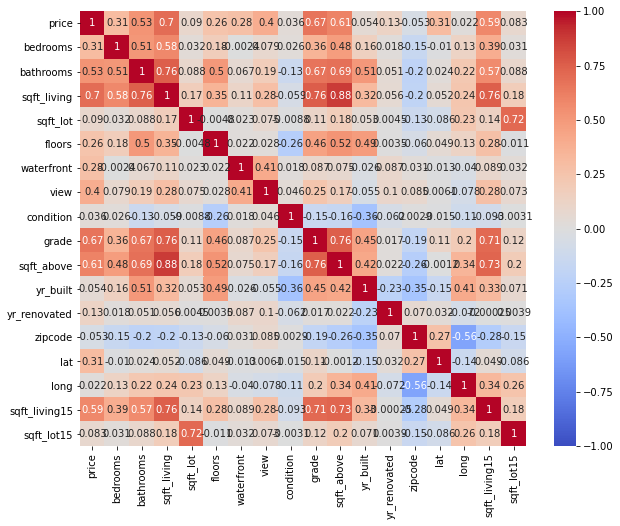

co_relation:
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308787   0.525906     0.701917  0.089876  0.256804   
bedrooms       0.308787  1.000000   0.514508     0.578212  0.032471  0.177944   
bathrooms      0.525906  0.514508   1.000000     0.755758  0.088373  0.502582   
sqft_living    0.701917  0.578212   0.755758     1.000000  0.173453  0.353953   
sqft_lot       0.089876  0.032471   0.088373     0.173453  1.000000 -0.004814   
floors         0.256804  0.177944   0.502582     0.353953 -0.004814  1.000000   
waterfront     0.276295 -0.002386   0.067282     0.110230  0.023143  0.021883   
view           0.395734  0.078523   0.186451     0.282532  0.075298  0.028436   
condition      0.036056  0.026496  -0.126479    -0.059445 -0.008830 -0.264075   
grade          0.667951  0.356563   0.665838     0.762779  0.114731  0.458794   
sqft_above     0.605368  0.479386   0.686668     0.876448  0.184139  0.523989   
yr_built       

In [37]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(co_relation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

print("co_relation:")
print(co_relation)

In [45]:
#which of the features indeed has a strong relationship to price
price_relation = df.corr()["price"]
price_relation

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.276295
view             0.395734
condition        0.036056
grade            0.667951
sqft_above       0.605368
yr_built         0.053953
yr_renovated     0.129599
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
Name: price, dtype: float64

### Findings; only the below features have got a direct relationship to price.
* bathrooms 
* living room size 
* grade
* above size
* and average size of living room in 15 neighbors 
### Thus we proceed with this features for further analysis of the impact they have on price.

#### Extracting relevant and important columns to use in understanding our data trends.

In [50]:
# relevant columns
rel_columns = ["price","bathrooms", "sqft_living",
               "grade", "sqft_above", "sqft_living15"]
rel_df = df[rel_columns] # loading the columns to a dataframe for analysis
rel_df.head()

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800


### Handling Missing Values

### Outlier Detection

In [51]:
# Check for missing values
missing_values = rel_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 price            0
bathrooms        0
sqft_living      0
grade            0
sqft_above       0
sqft_living15    0
dtype: int64


#### There are no missing values

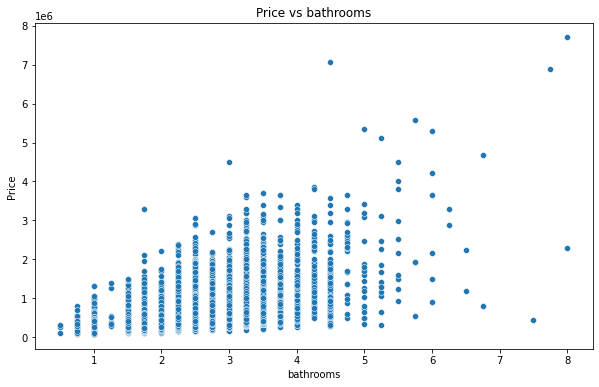

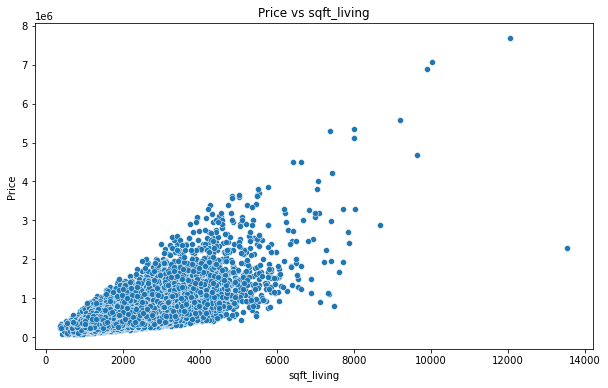

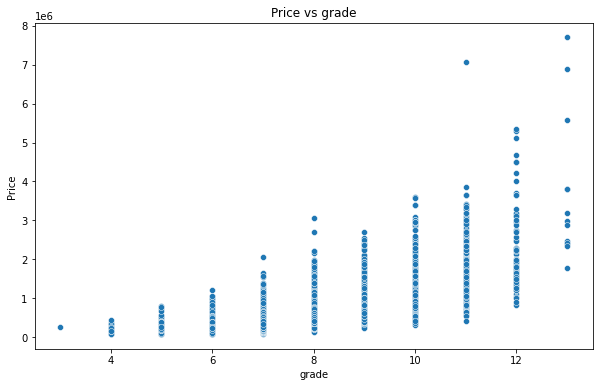

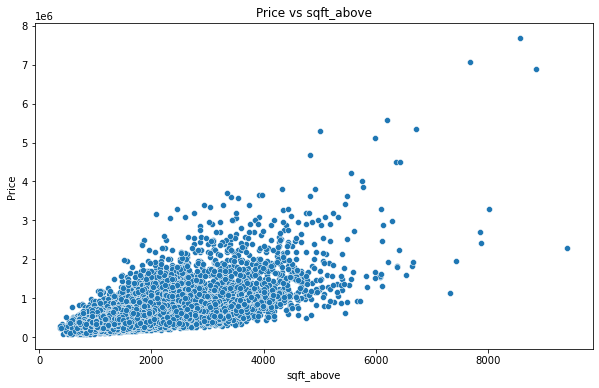

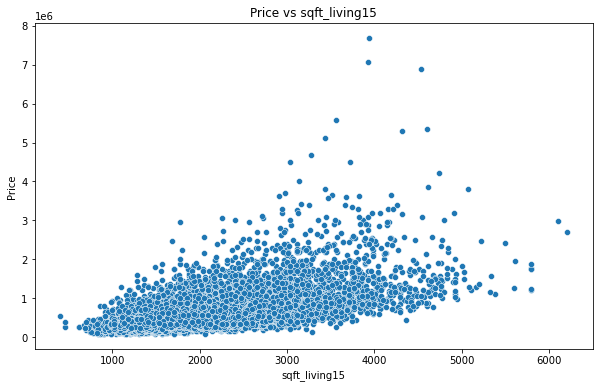

In [52]:
# Create scatter plots for each feature against price
for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=feature, y="price")
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

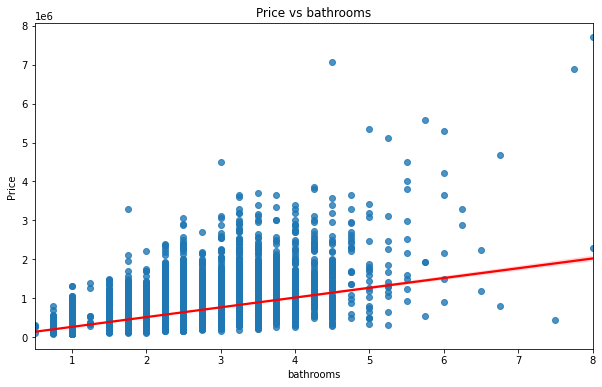

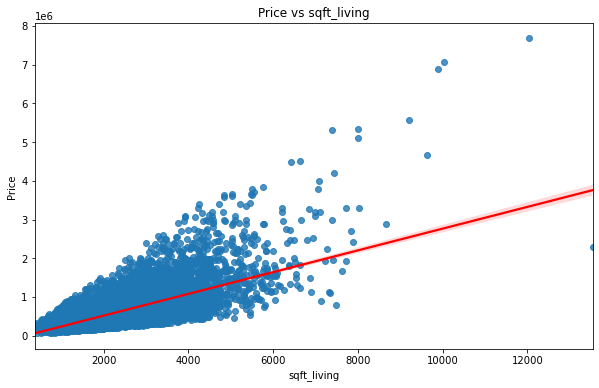

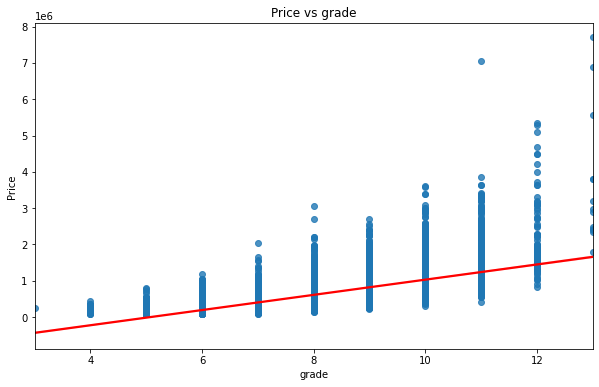

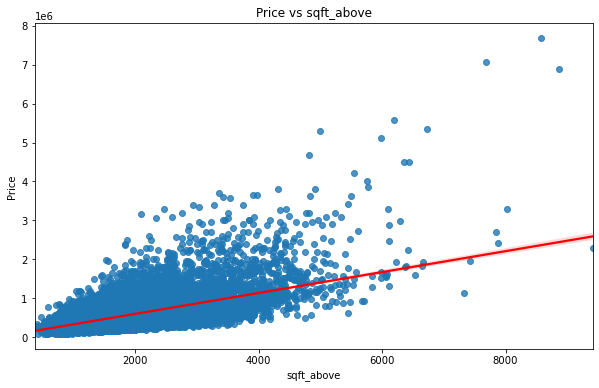

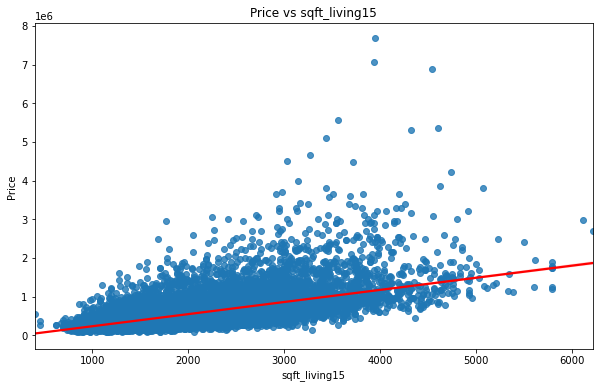

In [53]:
# Create scatter plots for each feature against price
for feature in rel_columns[1:]:  # Skip 'price' itself
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x=feature, y="price", line_kws={"color":"red"})
    plt.title(f"Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()